# ***Twitter Sentiment Analysis***

In [1]:
import pandas as pd
import string
# import the stop word list
from nltk.corpus import stopwords
# tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# nltk
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('wordnet')
nltk.download('stopwords')
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Utility
import re
import seaborn as sn
import numpy as np
import os
from collections import Counter
import pickle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ***Read Dataset***

In [2]:
df= pd.read_csv(r"twitter_dataset.csv")
df.head(2)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...


In [3]:
df1=df.drop("id",axis=1)
df1.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [4]:
tweet = df1["tweet"].str.split("#",n=1, expand =True)
tweet.head()

,0,1
0,,fingerprint #Pregnancy Test https://goo.gl/h1M...
1,Finally a transparant silicon case ^^ Thanks t...,yay #Sony #Xperia #S #sonyexperias… http://ins...
2,We love this! Would you go?,talk #makememories #unplug #relax #iphone #sma...
3,I'm wired I know I'm George I was made that wa...,iphone #cute #daventry #home http://instagr.am...
4,What amazing service! Apple won't even talk to...,None


**REMOVE PUNCTUATION***

In [5]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct
df1["tweet"] = df1["tweet"].apply(lambda x : remove_punctuation(x))
df1["tweet"].head(10)

0    fingerprint Pregnancy Test httpsgooglh1MfQV an...
1    Finally a transparant silicon case  Thanks to ...
2    We love this Would you go talk makememories un...
3    Im wired I know Im George I was made that way ...
4    What amazing service Apple wont even talk to m...
5    iPhone software update fucked up my phone big ...
6    Happy for us  instapic instadaily us sony xper...
7    New Type C charger cable UK httpwwwebaycoukitm...
8    Bout to go shopping again listening to music i...
9    Photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

***Tokenize Text***

In [6]:
tokenizer = RegexpTokenizer(f'\w+')
df1['tweet'] = df1["tweet"].apply(lambda x: tokenizer.tokenize(x.lower()))
df1["tweet"].head()

0    [fingerprint, pregnancy, test, httpsgooglh1mfq...
1    [finally, a, transparant, silicon, case, thank...
2    [we, love, this, would, you, go, talk, makemem...
3    [im, wired, i, know, im, george, i, was, made,...
4    [what, amazing, service, apple, wont, even, ta...
Name: tweet, dtype: object

In [7]:
lemmatizer = WordNetLemmatizer()
def word_lemma(text):
    lemm_text = [lemmatizer.lemmatize(i) for i in text]
    return lemm_text

In [8]:
df1["tweet"].apply(lambda x:word_lemma(x))

0       [fingerprint, pregnancy, test, httpsgooglh1mfq...
1       [finally, a, transparant, silicon, case, thank...
2       [we, love, this, would, you, go, talk, makemem...
3       [im, wired, i, know, im, george, i, wa, made, ...
4       [what, amazing, service, apple, wont, even, ta...
                              ...                        
7915    [live, out, loud, lol, liveoutloud, selfie, sm...
7916    [we, would, like, to, wish, you, an, amazing, ...
7917    [helping, my, lovely, 90, year, old, neighbor,...
7918    [finally, got, my, smart, pocket, wifi, stay, ...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: tweet, Length: 7920, dtype: object

In [9]:
a = df1['tweet'].values.tolist()

f = []
import string
s = string.ascii_letters

for i in a:
    c  = []
    b = ''
    for j in i:
        for k in j:
            if k in s:
                b += k
        if len(b)>0:
            c.append(b)
            b = ''
    f.append(c)

In [10]:
df1['clean_tweet'] = f

In [11]:
df2=df1.drop("tweet",axis=1)

## ***Remove stop words***

In [12]:
def remove_sw(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [13]:
df2["clean_tweet"]=df2["clean_tweet"].apply(lambda x: remove_sw(x))

In [14]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lemm_text=[lemmatizer.lemmatize(i) for i in text]
    return lemm_text

In [15]:
df2["clean_tweet"].apply(lambda x: word_lemmatizer(x))

0       [fingerprint, pregnancy, test, httpsgooglhmfqv...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, would, go, talk, makememories, unplug, ...
3       [im, wired, know, im, george, made, way, iphon...
4       [amazing, service, apple, wont, even, talk, qu...
                              ...                        
7915    [live, loud, lol, liveoutloud, selfie, smile, ...
7916    [would, like, wish, amazing, day, make, every,...
7917    [helping, lovely, year, old, neighbor, ipad, m...
7918    [finally, got, smart, pocket, wifi, stay, conn...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: clean_tweet, Length: 7920, dtype: object

***Stemming***

In [16]:
stemmer = PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text
df2["clean_tweet"] = df2["clean_tweet"].apply(lambda x: word_stemmer(x))
df2["clean_tweet"]

0       fingerprint pregnanc test httpsgooglhmfqv andr...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: clean_tweet, Length: 7920, dtype: object

In [17]:
df2.head()

,label,clean_tweet
0,0,fingerprint pregnanc test httpsgooglhmfqv andr...
1,0,final transpar silicon case thank uncl yay son...
2,0,love would go talk makememori unplug relax iph...
3,0,im wire know im georg made way iphon cute dave...
4,1,amaz servic appl wont even talk question unles...


## ***Data Visualisation***

Text(0, 0.5, 'Frequency')

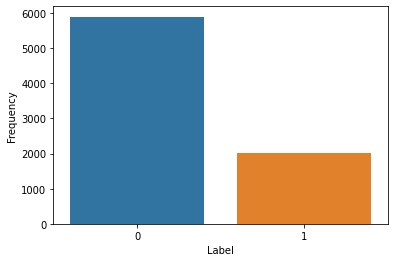

In [18]:
sn.countplot(df.label)
plt.xlabel('Label')
plt.ylabel('Frequency')

In [19]:
nagitive = df2[df2['label']==1]

positive = df2[df2['label']==0]

In [20]:
print(f'Negitive: {nagitive.shape}\n Positive: {positive.shape}')

Negitive: (2026, 2)
 Positive: (5894, 2)


In [21]:
fetch_one= df2.loc[df2['label']==1]
fetch_one.count()

label          2026
clean_tweet    2026
dtype: int64

In [22]:
all_words = " ".join(df2.clean_tweet)

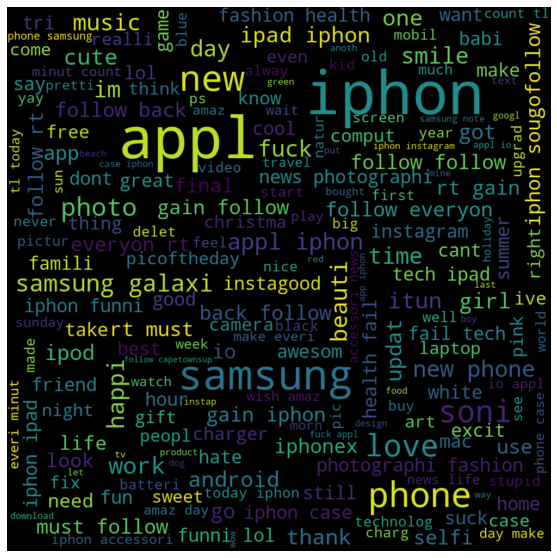

In [23]:
wordcloud = WordCloud(height=1000, width=1000, max_font_size = 110, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(all_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [24]:
df2.to_csv("clean_train_tweet.csv",index=False)
df2

,label,clean_tweet
0,0,fingerprint pregnanc test httpsgooglhmfqv andr...
1,0,final transpar silicon case thank uncl yay son...
2,0,love would go talk makememori unplug relax iph...
3,0,im wire know im georg made way iphon cute dave...
4,1,amaz servic appl wont even talk question unles...
...,...,...
7915,0,live loud lol liveoutloud selfi smile soni mus...
7916,0,would like wish amaz day make everi minut coun...
7917,0,help love year old neighbor ipad morn made rea...
7918,0,final got smart pocket wifi stay connect anyti...


# ***Map target label to String***

In [25]:
df3=df2.replace({"label":{0: "Positive"}})
final_df=df3.replace({"label":{1: "Negative"}})

In [26]:
final_df.describe()

,label,clean_tweet
count,7920,7920
unique,2,7793
top,Positive,gain follow rt must follow follow back follow ...
freq,5894,30


In [27]:
x=final_df.clean_tweet
y=final_df.label

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# create obj countvectoer
cv= CountVectorizer()
cv=CountVectorizer(stop_words="english")

## ***Split train and test***

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=False)

In [30]:
x_traincv=cv.fit_transform(x_train)
x_testcv =cv.transform(x_test)

# **Build Model**


In [31]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(x_traincv,y_train)
RF.score(x_traincv,y_train)

1.0

In [32]:
RF.score(x_testcv,y_test)

0.8800505050505051

In [33]:
#using naive_bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
clt=MultinomialNB()
clt.fit(x_traincv, y_train)
clt.score(x_traincv,y_train)

0.9275568181818182

In [34]:
clt.score(x_testcv,y_test)

0.8857323232323232

# **Predict**

In [35]:
#ACCURACY 
print("Accuracy of Model",clt.score(x_testcv,y_test)*100,"%")

Accuracy of Model 88.57323232323232 %


In [36]:
clt.predict(x_testcv)

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

# **Sample case**

In [39]:
#sample case 1
t = [" China took our land 🇮🇳 is negotiating to get it backb China says it’s not Indian land. PM has publicly supported China’s claim Why is PM backing China and not 🇮🇳 and our army? "]
vect = cv.transform(t).toarray()

In [40]:
print(clt.predict(vect))

['Positive']


In [ ]:
naivebayesML = open("model.pkl","wb")

In [ ]:
pickle.dump(clt,naivebayesML)


In [ ]:
naivebayesML.close()

In [ ]:
model = open("model.pkl","rb")

In [ ]:
new_model = pickle.load(model)

In [ ]:
new_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)